In [1]:
from PIL import Image
import glob
import tqdm
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
img = Image.open(r"data\MNIST - JPG - training\4\20.jpg")

In [3]:
img

In [4]:
img.size

(28, 28)

In [5]:
img.mode

'L'

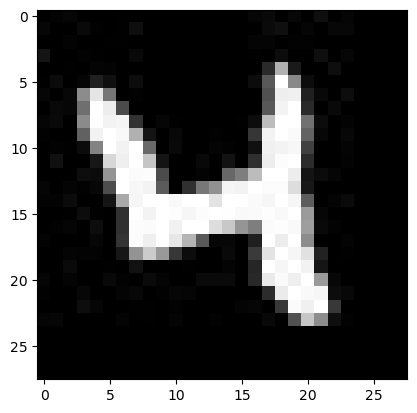

In [6]:
plt.imshow(img, cmap = "gray")

In [7]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
img_array = np.array(img)

In [9]:
img_array

array([[  0,   3,   6,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   6,   9,   0,   7,   0,  14,   0,   5,   0,   0,
          0,   0],
       [  6,   0,   0,   9,   2,   0,   1,  14,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  10,  15,   0,   5,   0,   7,   7,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   4,   4,   0,   2,   2,   0,   0,   0,   0,   0,
          0,   0],
       [ 20,   0,   0,   2,   1,   0,   0,   8,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,  12,   0,   0,  14,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   4,   3,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  42, 177,  26,   0,   0,  14,   0,   0,   0,
          0,   0],
       [  1,  11,   0,   5,  32,  15,   0,  12,   0,   0,   0,   0,   0,
          0,   0,   0,  12,  89, 255, 137,  12,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
img_array.shape #Height, Width

(28, 28)

In [11]:
28 * 28

784

In [12]:
img = img_array.flatten()

In [13]:
img.shape

(784,)

In [14]:
img

array([  0,   3,   6,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   6,   9,   0,   7,   0,  14,   0,   5,   0,   0,
         0,   0,   6,   0,   0,   9,   2,   0,   1,  14,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  10,  15,   0,   5,   0,   7,   7,
         0,   0,   0,   0,   0,   0,   3,   0,   0,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   4,   4,   0,   2,   2,   0,
         0,   0,   0,   0,   0,   0,  20,   0,   0,   2,   1,   0,   0,
         8,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  12,   0,
         0,  14,   0,   6,   0,   0,   0,   0,   0,   0,   1,   0,   4,
         3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
       177,  26,   0,   0,  14,   0,   0,   0,   0,   0,   1,  11,   0,
         5,  32,  15,   0,  12,   0,   0,   0,   0,   0,   0,   0,   0,
        12,  89, 255, 137,  12,   0,   0,   0,   0,   0,   0,   0,   6,
         0,   7, 140, 229, 117,   0,   2,   0,   0,   0,   0,   

## Load the entire dataset

In [15]:
glob.glob("data\MNIST - JPG - training\*")

['data\\MNIST - JPG - training\\0',
 'data\\MNIST - JPG - training\\1',
 'data\\MNIST - JPG - training\\2',
 'data\\MNIST - JPG - training\\3',
 'data\\MNIST - JPG - training\\4',
 'data\\MNIST - JPG - training\\5',
 'data\\MNIST - JPG - training\\6',
 'data\\MNIST - JPG - training\\7',
 'data\\MNIST - JPG - training\\8',
 'data\\MNIST - JPG - training\\9']

In [16]:
glob.glob(r"data\MNIST - JPG - training\0\*.jpg")

['data\\MNIST - JPG - training\\0\\1.jpg',
 'data\\MNIST - JPG - training\\0\\1000.jpg',
 'data\\MNIST - JPG - training\\0\\10005.jpg',
 'data\\MNIST - JPG - training\\0\\10010.jpg',
 'data\\MNIST - JPG - training\\0\\10022.jpg',
 'data\\MNIST - JPG - training\\0\\10025.jpg',
 'data\\MNIST - JPG - training\\0\\10026.jpg',
 'data\\MNIST - JPG - training\\0\\10045.jpg',
 'data\\MNIST - JPG - training\\0\\10069.jpg',
 'data\\MNIST - JPG - training\\0\\10071.jpg',
 'data\\MNIST - JPG - training\\0\\10080.jpg',
 'data\\MNIST - JPG - training\\0\\10083.jpg',
 'data\\MNIST - JPG - training\\0\\10107.jpg',
 'data\\MNIST - JPG - training\\0\\10119.jpg',
 'data\\MNIST - JPG - training\\0\\10120.jpg',
 'data\\MNIST - JPG - training\\0\\10121.jpg',
 'data\\MNIST - JPG - training\\0\\10128.jpg',
 'data\\MNIST - JPG - training\\0\\10140.jpg',
 'data\\MNIST - JPG - training\\0\\1015.jpg',
 'data\\MNIST - JPG - training\\0\\10167.jpg',
 'data\\MNIST - JPG - training\\0\\10168.jpg',
 'data\\MNIST - JPG

In [17]:
folder_paths = glob.glob(r"data\MNIST - JPG - training\*")

In [18]:
folder_paths

['data\\MNIST - JPG - training\\0',
 'data\\MNIST - JPG - training\\1',
 'data\\MNIST - JPG - training\\2',
 'data\\MNIST - JPG - training\\3',
 'data\\MNIST - JPG - training\\4',
 'data\\MNIST - JPG - training\\5',
 'data\\MNIST - JPG - training\\6',
 'data\\MNIST - JPG - training\\7',
 'data\\MNIST - JPG - training\\8',
 'data\\MNIST - JPG - training\\9']

In [19]:
np.random.randint(1,10)

3

In [20]:
X = [] #Input or features -- pixels values
y = [] #target -- labels

#crawling to all the folders
for each_folder in tqdm.tqdm(folder_paths):
    # get the classname from folder_path
    class_name = each_folder.split("\\")[-1]
    #crawling to all the image in the each_folder
    for img_path in glob.glob(each_folder + "\*.jpg"):
        #print(img_path)
        #Read the image from the path
        img = Image.open(img_path)
        img = img.convert("L")
       
        #Convert to numpy array
        img_array = np.array(img)
        
            
        #flatten to covert 28,28 to 784 pixels to form a row
        img_array = img_array.flatten()
        #append the img in X
        X.append(img_array)
        #append the class_name
        y.append(class_name)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [08:22<00:00, 50.30s/it]


In [21]:
X = np.array(X)
y = np.array(y)

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
X.shape

(60000, 784)

In [24]:
y

array(['0', '0', '0', ..., '9', '9', '9'], dtype='<U1')

In [25]:
X = pd.DataFrame(X)

In [26]:
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,12,0,5,4,0,5,4,0,8,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,5,...,9,1,0,6,0,2,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,3,7,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y

array(['0', '0', '0', ..., '9', '9', '9'], dtype='<U1')

In [28]:
y = pd.Series(y)

In [29]:
y.name = "label"

In [30]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59995    9
59996    9
59997    9
59998    9
59999    9
Name: label, Length: 60000, dtype: object

In [31]:
dataset = pd.concat([X,y], axis = 1)

In [32]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,12,0,5,4,0,5,4,0,8,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
59996,0,0,0,0,0,0,0,0,0,5,...,1,0,6,0,2,0,0,0,0,9
59997,0,0,0,0,0,0,0,0,0,1,...,0,0,0,3,7,0,0,0,0,9
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [33]:
for i in range(5):
    dataset = dataset.sample(n = len(dataset))

In [34]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
48126,4,0,0,7,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
27702,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
18113,0,0,11,0,0,0,2,0,0,10,...,0,0,0,0,0,0,0,0,0,2
5954,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
45262,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,0,0,0,0,7


In [35]:
X = dataset.iloc[:,:784]

In [36]:
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
48126,4,0,0,7,10,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
27702,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
18113,0,0,11,0,0,0,2,0,0,10,...,0,0,0,0,0,0,0,0,0,0
5954,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
45262,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45586,0,0,0,0,0,0,0,0,10,2,...,0,0,0,0,0,0,0,0,0,0
50651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32488,0,0,0,0,0,0,0,0,0,6,...,4,0,0,3,5,0,0,0,0,0
52025,0,0,10,9,0,0,4,0,2,7,...,1,0,0,8,3,0,0,0,0,0


In [37]:
y = dataset["label"]

In [38]:
y

48126    7
27702    4
18113    2
5954     1
45262    7
        ..
45586    7
50651    8
32488    5
52025    8
17811    2
Name: label, Length: 60000, dtype: object

In [39]:
60000/32

1875.0

In [40]:
y.unique()

array(['7', '4', '2', '1', '3', '8', '6', '9', '0', '5'], dtype=object)

In [41]:
y.nunique()

10

In [42]:
y.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

C:\Users\7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

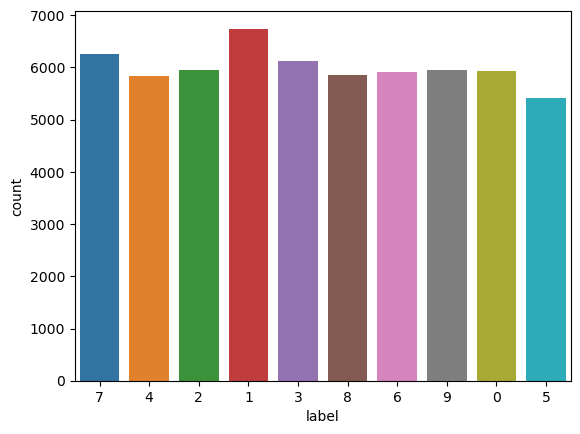

In [43]:
sns.countplot(y)

### Split into train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 35)

In [45]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
11227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13637,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
41547,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
23500,4,0,0,6,3,2,4,0,4,8,...,6,6,2,0,0,1,0,0,0,0
12093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,0,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0
9705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12918,6,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21391,0,6,0,1,7,0,0,4,0,4,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train

11227    1
13637    2
41547    6
23500    3
12093    1
        ..
2915     0
9705     1
12918    2
21391    3
42290    7
Name: label, Length: 48000, dtype: object

In [47]:
y_train = keras.utils.to_categorical(y_train)

In [48]:
y_test = keras.utils.to_categorical(y_test)

In [49]:
y_train.shape

(48000, 10)

### Scaling

In [50]:
sc = MinMaxScaler()

In [51]:
X_train = sc.fit_transform(X_train)

In [52]:
X_train

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.3, 0.2, 0. , ..., 0. , 0. , 0. ],
       [0. , 0.3, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [53]:
X_test = sc.transform(X_test)

In [54]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Build The model

##### Init the Neural Network model

In [55]:
nn_model = Sequential()

In [56]:
X_train.shape

(48000, 784)

###### Add input layer

In [57]:
X_train.shape[1]

784

In [58]:
#shape -- shape of input, no of neurons in input layer
inp_layer = Input(shape = (X_train.shape[1],) )

In [59]:
nn_model.add(inp_layer)

### Add Hidden layer

In [60]:
#units -- no of neurons in hidden layer
# kernel -- weights -- kernel_initializer -- strategy to init the weights
#activation -- the activation function for this layer
hidden_layer = Dense(units = 200, kernel_initializer = "random_uniform", activation = "relu", bias_initializer = "random_uniform")

In [61]:
nn_model.add(hidden_layer)

### Add Output layer

In [62]:
output_layer = Dense(units = 10, kernel_initializer = "random_uniform", activation = "softmax", bias_initializer = "random_uniform")

In [63]:
nn_model.add(output_layer)

In [64]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
plot_model(nn_model, show_shapes=True, show_dtype=True,)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [66]:
#compile
#strategies to be followed while training

nn_model.compile(loss="categorical_crossentropy",optimizer = "adam", metrics = ["accuracy"])

In [67]:
nn_model.fit(X_train,y_train, epochs = 5, batch_size = 32)

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3025 - accuracy: 0.9160
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1290 - accuracy: 0.9614
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0849 - accuracy: 0.9745
Epoch 4/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0597 - accuracy: 0.9818
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0435 - accuracy: 0.9862


### Predict

In [68]:
X_test.shape

(12000, 784)

In [69]:
y_pred = nn_model.predict(X_test)

375/375 [==============================] - 1s 3ms/step


In [70]:
np.set_printoptions(precision=2, suppress = True)

In [71]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.99, 0.  , 0.01],
       ...,
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]], dtype=float32)

In [72]:
y_pred.shape

(12000, 10)

In [73]:
y_pred = np.argmax(y_pred, axis = 1)

In [74]:
y_pred

array([8, 9, 7, ..., 2, 6, 9], dtype=int64)

In [75]:
y_test = np.argmax(y_test, axis = 1)

In [76]:
y_test

array([0, 9, 7, ..., 2, 6, 9], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred)

0.9694166666666667

In [78]:
cm_test = confusion_matrix(y_test,y_pred)

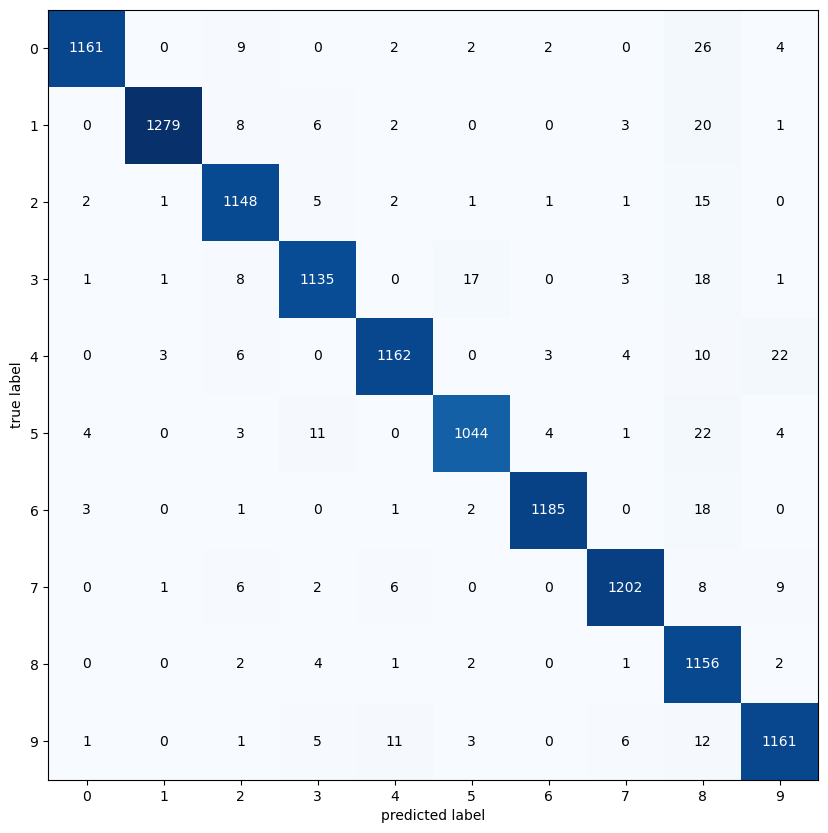

In [79]:
plot_confusion_matrix(cm_test, figsize=(10,10))
plt.xticks(range(0,10))
plt.yticks(range(0,10))
plt.show()

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1206
           1       1.00      0.97      0.98      1319
           2       0.96      0.98      0.97      1176
           3       0.97      0.96      0.97      1184
           4       0.98      0.96      0.97      1210
           5       0.97      0.96      0.96      1093
           6       0.99      0.98      0.99      1210
           7       0.98      0.97      0.98      1234
           8       0.89      0.99      0.93      1168
           9       0.96      0.97      0.97      1200

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



### Save the model

In [81]:
nn_model.save("mnist_digit.h5")

C:\Users\7240\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
